In [1]:
import os
import sys
import fitsio
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import matplotlib as mpl

from   astropy.table import Table

In [2]:
cwd = os.getcwd()
code_root = '/'.join(x for x in cwd.split('/')[:-2])

sys.path.append(code_root)

print(cwd)
print(code_root)

/cosma/home/durham/dc-wils7/DESI/docs/nb
/cosma/home/durham/dc-wils7/DESI


In [3]:
import pubplot

from   cosmo         import cosmo, fsky
from   cartesian     import rotate
from   findfile      import findfile
# from   poisson     import fillfactor_expectation, fillfactor_poisson

In [4]:
survey  = 'gama'
field   = 'G9'
dryrun  = False
realz   = 0
version = 'GAMA4'

In [5]:
nbar   = 2.
radius = 8.

In [6]:
fpath = findfile(ftype='randoms', field=field, dryrun=dryrun, survey=survey, version=version)
rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.039),
             ('ZMAX', 0.263),
             ('DZ', 0.0001),
             ('NRAND', 1265954),
             ('FIELD', 'G9'),
             ('AREA', 60.0),
             ('VOL', 2531908.950723488),
             ('RAND_DENS', 0.4999998122516435),
             ('VOL8', 2144.660584850632),
             ('OVERSAMPLE', 1),
             ('SEED', 364),
             ('PREFIX', 'randoms'),
             ('REALZ', 0),
             ('NRAND8', 1072.329889768816),
             ('NRAND8_PERR', 32.74644850619401),
             ('EXTNAME', 'RANDOMS')])

In [7]:
bound = Table.read(fpath, 'BOUNDARY')
bound

<Table length=540000>
     BOUND_RA           BOUND_DEC                Z                  V          ...   ROTCARTESIAN_X      ROTCARTESIAN_Y      ROTCARTESIAN_Z   
     float64             float64              float64            float64       ...      float64             float64             float64       
------------------ -------------------- ------------------- ------------------ ... ------------------ ------------------- --------------------
             141.0  0.40063778486427637 0.07144800497783309 47927.407498281864 ... 210.11147553008232  22.083091861130512  -0.3562827379473492
             141.0   0.9719219102434473 0.04367667418526872  3816.802902615331 ... 129.13798862230786  13.571446052003303   1.0757457898906768
             129.0   2.7601640018222424 0.12577607528972545 293793.99550875596 ...  365.5790789783938  -38.40912363796099   14.525602792833633
             129.0     1.31087012077912 0.08313844598273315  80366.67149343388 ... 243.90061456629806 -25.630817126773366   3.4827308732609294
             141.0   2.6954966166290735 0.18725231391459907    953718.15460282 ...  537.3779388733319   56.45952320493319    20.74093260739289
             129.0   1.9719885776508628 0.17165427393637708  739844.1111491593 ...  494.4340205018058 -51.953391633390254    12.79904680659359
             129.0   1.7307081189790998 0.08372085245391617   82237.1298696577 ... 245.54876611095474 -25.802356747576752    5.316026278573695
             129.0 -0.09175657507305623  0.2463790153223925  2102735.415932571 ...  698.6268181583906  -73.43246542513236   -7.221908047315347
             141.0  -0.5835953732819252  0.1403536594851054 408189.51037352736 ...  406.9746455568911   42.78021145261579  -7.7205873369774345
             129.0  -1.8839431549239436 0.17276930854787279  754006.7210324671 ... 497.26132875865756  -52.28135194127714  -20.791980720113642
             141.0  -0.3938154868387427 0.16746542739363773  688145.2103103782 ...  482.8913321341562   50.75891830182442    -7.55201348659572
             129.0   1.1570350781675351 0.21643734930388117 1450485.2900983344 ...  617.6982968614346  -64.91367488949078   7.1524193654184165
             129.0   -0.840820453560595 0.05425456949521661  15888.43650788511 ... 160.04526499378144  -16.82424238121257  -3.7589625967205396
             141.0   2.0576561961799573 0.10781356459516217 183619.50010281499 ... 314.64359937021277   33.06121099126452    8.618315624249563
               ...                  ...                 ...                ... ...                ...                 ...                  ...
130.89655440616008   0.9335325948066089               0.039                0.0 ... 115.75367962265716  -8.303456215083962   0.8807218128258669
133.99472216357958  -1.5899954443938267               0.263 2531908.9507234883 ...  746.5783329644479 -13.104039500315082  -27.248440352049833
 137.0595562172913 -0.06886743186035393               0.039                0.0 ... 115.97377163607143   4.170796541224284  -1.1515862660796694
140.38932654807275  -0.8380982010911231               0.263 2531908.9507234883 ...  743.6840888863524   70.17073942060551   -17.41964038837747
    135.3299369993   0.7317525750286116               0.039                0.0 ... 116.05158545126041  0.6682398919296304  0.46943786361565465
133.50645007166747   -1.054822831364793               0.039                0.0 ... 115.97231035564926  -3.024378593683025    -3.14861352140955
131.29349214991277  -1.4155490616562405               0.263 2531908.9507234883 ...   745.210418755355  -48.28786753875636  -24.962256144970713
131.07975644173825   1.5754841720463562               0.039                0.0 ... 115.76258112186207 -7.9313868524418325    2.180668891276692
130.10107890087667  -1.9492216580184225               0.263 2531908.9507234883 ...  743.7798950189851 -63.771759185303665  -31.906599642987153
131.23082478694207   0.5143612706807854               0.039                0.0 ... 115.80344655689024  -7.62877377667

In [8]:
fpath = findfile(ftype='randoms_n8', field=field, dryrun=dryrun, survey=survey, version=version)
rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.039),
             ('ZMAX', 0.263),
             ('DZ', 0.0001),
             ('NRAND', 1265954),
             ('FIELD', 'G9'),
             ('AREA', 60.0),
             ('VOL', 2531908.950723488),
             ('RAND_DENS', 0.4999998122516435),
             ('VOL8', 2144.660584850632),
             ('OVERSAMPLE', 1),
             ('SEED', 364),
             ('PREFIX', 'randoms'),
             ('REALZ', 0),
             ('NRAND8', 1072.329889768816),
             ('NRAND8_PERR', 32.74644850619401),
             ('EXTNAME', 'RANDOMS'),
             ('RSPHERE', 8.0),
             ('IMMUTABLE', 'FALSE')])

In [9]:
fpath = findfile(ftype='randoms_bd', field=field, dryrun=dryrun, survey=survey, version=version)
rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.039),
             ('ZMAX', 0.263),
             ('DZ', 0.0001),
             ('NRAND', 1265954),
             ('FIELD', 'G9'),
             ('AREA', 60.0),
             ('VOL', 2531908.950723488),
             ('RAND_DENS', 0.4999998122516435),
             ('VOL8', 2144.660584850632),
             ('OVERSAMPLE', 1),
             ('SEED', 364),
             ('PREFIX', 'randoms'),
             ('REALZ', 0),
             ('NRAND8', 1072.329889768816),
             ('NRAND8_PERR', 32.74644850619401),
             ('EXTNAME', 'RANDOMS'),
             ('RSPHERE', 8.0),
             ('IMMUTABLE', 'FALSE')])

In [10]:
rand

<Table length=1265954>
    RANDOM_RA           RANDOM_DEC               Z                  V          ...     BOUND_DIST     BOUNDID FILLFACTOR_POISSON
     float64             float64              float64            float64       ...      float64        int64       float64      
------------------ -------------------- ------------------- ------------------ ... ------------------ ------- ------------------
 136.3741181797326  -1.6756131696511216 0.17175931722091956  750694.1682534826 ...  2.818241278457824  515565 0.7546648546316045
 136.2320059555102 -0.02864175934228418  0.2149048142286497 1430622.5786727704 ...  21.22775504773427  362920 0.9739303151756341
138.70932669446557  -1.3607506923771044  0.1708338995556766  739055.3493861053 ...  5.523151102364128  248613 0.9375609245909785
 135.2864381600576    2.513365429491348  0.2042959163822513 1237426.7122941471 ...   5.00142933992315  491040 0.9134312327607743
130.25972515006953   1.5128236655368683  0.1640760601222091  657554.6334174956 ... 10.472956561562249  516515 0.9819735457857022
 140.7211320032869    2.615164617436859 0.23627281366513994 1875137.3115263632 ...  3.287326953121613  449284 0.7024421399459451
136.63315513869114  0.32397962898508276  0.2139543393018517 1412587.1285599978 ...  24.92872958746533  450471 1.0019067694715231
135.06217756462675   0.4575377263975235 0.22021343189874412 1534031.7061576585 ...  27.08213217121663  416210 0.9871025624066152
129.87028930302017    2.424256317717603 0.13760579523655458   394324.142562676 ... 4.0505390604535565  427678 0.7982614959093648
133.19103566576047  -0.6025897650307092  0.2237485955024587 1605438.8344166274 ... 15.636860465488507  393504 0.9985262812441031
140.84961528221686  -1.4330630217415719  0.1728403680587349  764438.1277614394 ...  1.322773308489158  452012 0.5542835007372998
130.53560924401094  -1.3562875720609817 0.19782096426359785 1128113.1339077016 ...  6.433506133825954  164270 0.9902499135149027
133.57107316405535    1.504606540003749  0.2129162364481619 1393053.6285654805 ...  15.97163493370749  372876 1.0140298996664083
130.21605092917895   1.7124669468409517 0.22299838549416512  1590113.678562107 ... 13.565634790819757  113046 0.9924647161466605
               ...                  ...                 ...                ... ...                ...     ...                ...
134.35779602043647  -1.4019409548410395  0.2595307996859538 2447749.2822604636 ...  7.702356170353511  423733 0.9977103013271398
132.16277639051003  -1.6141459973364722 0.12856414221985119 323384.80959976546 ... 2.5338208470915085  201774 0.7342653567075188
130.59751143063042    2.632282430182328  0.1989863070593484 1147314.8052585856 ...  3.716336541675019  161066 0.8262379502052537
139.79751618005199   0.2982331312281259  0.2461894263748642  2107646.581098974 ...  14.73967981631943  175766 0.9802250173922091
132.88326200461242 0.055682983751182295 0.21531025446461483  1438360.039662949 ... 22.173730185454136  530462 0.9931641275040578
 134.1484569325811    2.441570507503745  0.1613607048793751  626509.3478798396 ...  4.569224009571076  450539 0.8793932133674427
136.69016924596025  -0.9002786961628493  0.1524686751925081   531477.812039776 ...  8.512060731921183  448273 1.0010907895545598
134.21677530211707   0.6757942262755308 0.17826367140756527   835816.951398121 ... 20.922756113097034  440396 1.0129807826303125
131.65995267990718   -1.570580403554905 0.18284610394566475  899336.9490704482 ...  3.982996943801982  259842 0.8537481302628779
130.08514753458422   -1.240251937748953 0.10249141745885373  166463.4593282327 ...  4.013621601169312  517423 0.8079366863533597
134.48121017275764   1.1608749441930877 0.25738329983386277 2390852.2907585953 ... 15.094799040567286  399110 1.0031890236267513
140.72784179031612   2.5040941411396735 0.25593567874488643 2352968.0006396347 ...  3.509025068875416   68404  0.781242486212699
137.81659106415998  -1.0648298015384763 0.13509941154575916  373744.4340354722 ...  6.439182205573494  4582

In [11]:
fpath = findfile(ftype='randoms_bd_ddp_n8', field=field, dryrun=dryrun, survey=survey, version=version)

rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.039),
             ('ZMAX', 0.263),
             ('DZ', 0.0001),
             ('NRAND', 1265954),
             ('FIELD', 'G9'),
             ('AREA', 180.0),
             ('VOL', 2531908.950723488),
             ('RAND_DENS', 0.4999998122516435),
             ('VOL8', 2144.660584850632),
             ('OVERSAMPLE', 1),
             ('SEED', 364),
             ('PREFIX', 'randoms'),
             ('REALZ', 0),
             ('NRAND8', 1072.329889768816),
             ('NRAND8_PERR', 32.74644850619401),
             ('EXTNAME', 'RANDOMS'),
             ('RSPHERE', 8.0),
             ('IMMUTABLE', 'False'),
             ('GOLD_NGAL', 113687),
             ('THETA_DEF', 'Z_THETA_QCOLOR'),
             ('DDP1_ZMIN', 0.0390699990093708),
             ('DDP1_ZMAX', 0.2629899978637695),
             ('DDP1_VZ', 7594754.153764196),
             ('DDP1ZLIMS_NGAL', 113687),
             ('DDP1_NGAL', 45293),
             ('DDP1_DENS', 0.005963721679858641),
             ('DD

Text(0, 0.5, 'DEC [deg.]')

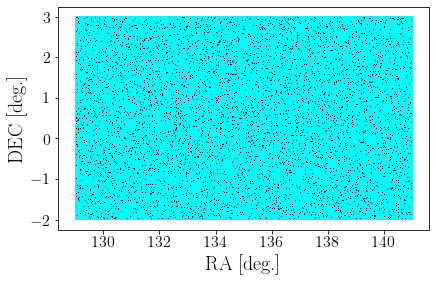

In [12]:
pl.plot(rand['RANDOM_RA'], rand['RANDOM_DEC'], marker=',', lw=0.0, c='k')
pl.plot(bound['BOUND_RA'], bound['BOUND_DEC'], marker=',', lw=0.0, c='cyan')
pl.xlabel('RA [deg.]')
pl.ylabel('DEC [deg.]')

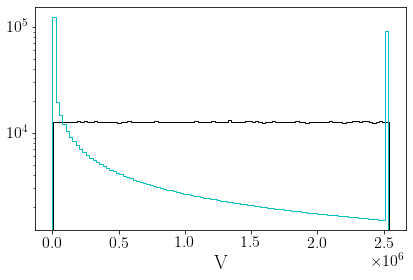

In [13]:
_ = pl.hist(rand['V'], bins=100, histtype='step', color='k')
_ = pl.hist(bound['V'], bins=100, histtype='step', color='c')

pl.xlabel('V')
pl.yscale('log')

(0.0, 0.6)

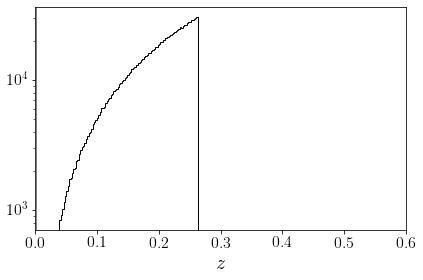

In [14]:
_ = pl.hist(rand['Z'], bins=100, histtype='step', color='k')

pl.axvline(300. / 2.9979e5, lw=0.5, c='k')

pl.yscale('log')
pl.xlabel('$z$')

pl.xlim(0.0, 0.6)

In [15]:
pos       = np.c_[rand['ROTCARTESIAN_X'], rand['ROTCARTESIAN_Y'], rand['ROTCARTESIAN_Z']]
pos_bound = np.c_[bound['ROTCARTESIAN_X'], bound['ROTCARTESIAN_Y'], bound['ROTCARTESIAN_Z']]

Text(0, 0.5, '$y$')

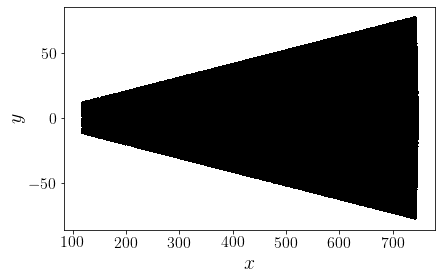

In [16]:
pl.plot(pos[::1,0], pos[::1,1], marker=',', lw=0.0, c='k')

pl.xlabel('$x$')
pl.ylabel('$y$')

Text(0, 0.5, '$y$')

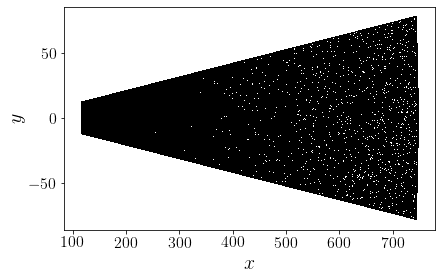

In [17]:
pl.plot(pos_bound[:,0], pos_bound[:,1], marker=',', lw=0.0, c='k')
pl.xlabel('$x$')
pl.ylabel('$y$')

(0.0, 1000.0)

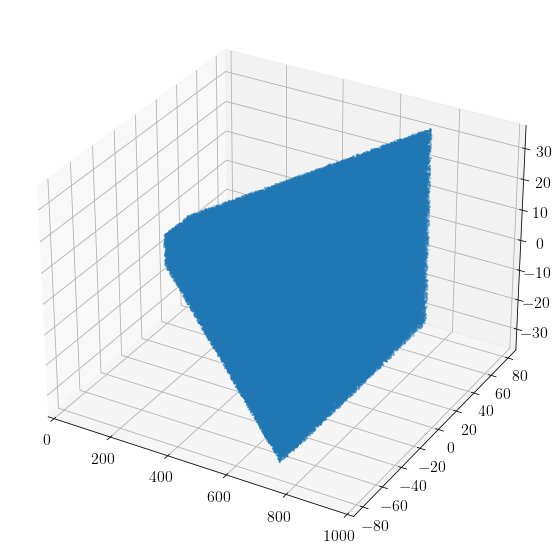

In [18]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

ax.scatter(pos[::1, 0],\
           pos[::1, 1],\
           pos[::1, 2],\
           marker='.',\
           lw=0.0)

ax.set_xlim(0.0, 1000.)

(0.0, 1000.0)

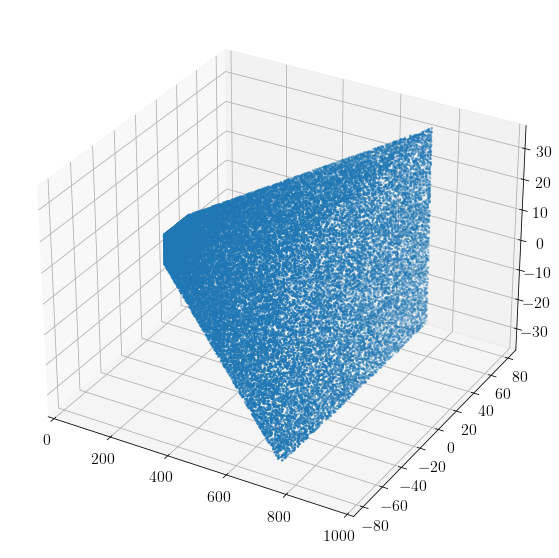

In [19]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

ax.scatter(pos_bound[:,0][::10],\
           pos_bound[:,1][::10],\
           pos_bound[:,2][::10],\
           marker='.',\
           lw=0.0)

ax.set_xlim(0.0, 1000.)

In [20]:
np.mean(rand['V'] < np.percentile(rand['V'], 1.))

0.01000036336233386

In [21]:
rand['RAND_N8'].data.min(), rand['RAND_N8'].data.max()

(1384, 8934)

(50.0, 9500.0)

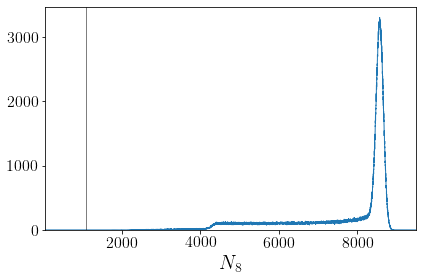

In [22]:
_ = pl.hist(rand['RAND_N8'], bins=np.arange(0, 9500, 1), histtype='step')

pl.axvline(rand.meta['NRAND8'], c='k', lw=0.5)

pl.xlabel(r'$N_8$')
pl.xlim(50., 9500.)

In [23]:
# 100. * np.sqrt(rand.meta['NRAND8']) / rand.meta['NRAND8']

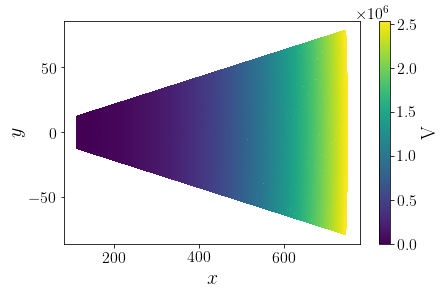

In [24]:
# isin = rand['IS_BOUNDARY'].astype(bool)

pl.scatter(pos_bound[:,0], pos_bound[:,1], lw=0.0, c=bound['V'], s=2)
pl.xlabel('$x$')
pl.ylabel('$y$')
pl.colorbar(label='V')

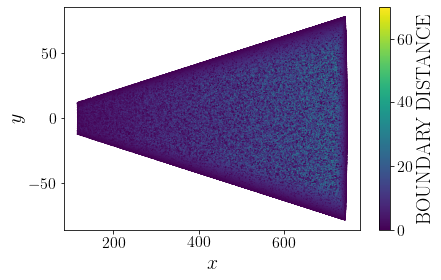

In [25]:
pl.scatter(pos[:,0], pos[:,1], lw=0.0, c=rand['BOUND_DIST'], s=2, vmin=0., vmax=70.)
pl.xlabel('$x$')
pl.ylabel('$y$')
pl.colorbar(label='BOUNDARY DISTANCE')

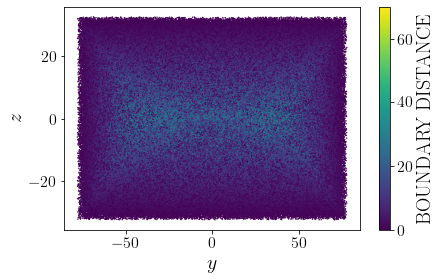

In [26]:
pl.scatter(pos[:,1], pos[:,2], lw=0.0, c=rand['BOUND_DIST'], s=2, vmin=0., vmax=70.)
pl.xlabel('$y$')
pl.ylabel('$z$')
pl.colorbar(label='BOUNDARY DISTANCE')

In [27]:
# pl.scatter(pos_bound[:,0], pos_bound[:,1], lw=0.0, c=bound['RAND_N8'], vmin=0, vmax=1500, s=2)
# pl.xlabel('$x$')
# pl.ylabel('$y$')
# pl.colorbar(label=r'$N_8$')

(0.2, 1.1)

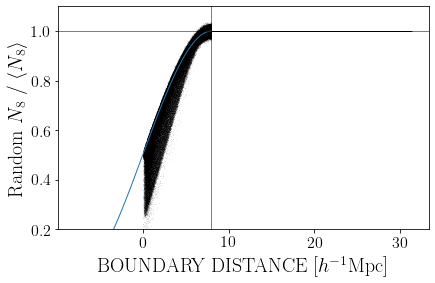

In [28]:
def theory_ff(bound_dist, radius):
    d = bound_dist
    r = radius
    sphere_cap_vol = 1. - (3. * 8. - d) * d**2 / 4. / 8**3. # [V sphere]
    
    return sphere_cap_vol

d = np.arange(0., 16., 0.1)
r = np.ones_like(d) * 8 # Mpc/h

sphere_cap_vol = 1. - (3. * 8. - d) * d**2 / 4. / 8**3. # [V sphere]

#isin = ~rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['BOUND_DIST'], rand['FILLFACTOR'], marker='.', lw=0.0, s=2, alpha=0.1, c='k')

# pl.plot(8. - d, sphere_cap_vol)
pl.plot(8. - d, theory_ff(d, 8), lw=1.)

pl.xlabel('BOUNDARY DISTANCE [$h^{-1}$Mpc]')
pl.ylabel(r'Random $N_8 \ / \ \langle N_8 \rangle$')

pl.axhline(1.00, c='k', lw=0.5)
pl.axvline(8.00, c='k', lw=0.5)

pl.ylim(0.2, 1.1)

Text(0.5, 0, 'BOUND_DIST [$h^{-1}$Mpc]')

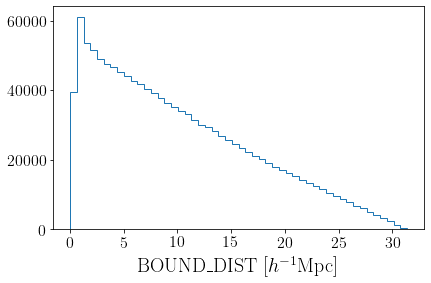

In [29]:
_ = pl.hist(rand['BOUND_DIST'], bins=50, histtype='step')
pl.xlabel('BOUND_DIST [$h^{-1}$Mpc]')

In [30]:
fpath = findfile(ftype='ddp_n8', dryrun=dryrun, survey=survey, version=version)
gold  = Table.read(fpath)
gold.meta

OrderedDict([('AREA', 180.0),
             ('GOLD_NGAL', 113687),
             ('IMMUTABLE', 'False'),
             ('THETA_DEF', 'Z_THETA_QCOLOR'),
             ('DDP1_ZMIN', 0.0390699990093708),
             ('DDP1_ZMAX', 0.2629899978637695),
             ('DDP1_VZ', 7594754.153764196),
             ('DDP1ZLIMS_NGAL', 113687),
             ('DDP1_NGAL', 45293),
             ('DDP1_DENS', 0.005963721679858641),
             ('DDP2_ZMIN', 0.03914999961853027),
             ('DDP2_ZMAX', 0.1937000006437302),
             ('DDP2_VZ', 3156659.558717707),
             ('DDP2ZLIMS_NGAL', 73942),
             ('DDP2_NGAL', 33396),
             ('DDP2_DENS', 0.01057953807776663),
             ('DDP3_ZMIN', 0.03903000056743622),
             ('DDP3_ZMAX', 0.1015800014138222),
             ('DDP3_VZ', 457819.2340050841),
             ('DDP3ZLIMS_NGAL', 18121),
             ('DDP3_NGAL', 8842),
             ('DDP3_DENS', 0.01931329953669401),
             ('TMR_DDP1', '[-21.8, -20.1]'),
        

In [31]:
fpath = findfile(ftype='randoms_bd_ddp_n8', field=field, dryrun=dryrun, survey=survey, version=version, prefix='randoms_ddp1')

rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.0390699990093708),
             ('ZMAX', 0.2629899978637695),
             ('DZ', 0.0001),
             ('NRAND', 1265792),
             ('FIELD', 'G9'),
             ('AREA', 180.0),
             ('VOL', 2531584.717921398),
             ('RAND_DENS', 0.4999998582071158),
             ('VOL8', 2144.660584850632),
             ('OVERSAMPLE', 1),
             ('SEED', 364),
             ('PREFIX', 'randoms_ddp1'),
             ('REALZ', 0),
             ('NRAND8', 1072.329988327706),
             ('NRAND8_PERR', 32.74645001107304),
             ('EXTNAME', 'RANDOMS'),
             ('RSPHERE', 8.0),
             ('IMMUTABLE', 'False'),
             ('GOLD_NGAL', 113687),
             ('THETA_DEF', 'Z_THETA_QCOLOR'),
             ('DDP1_ZMIN', 0.0390699990093708),
             ('DDP1_ZMAX', 0.2629899978637695),
             ('DDP1_VZ', 7594754.153764196),
             ('DDP1ZLIMS_NGAL', 113687),
             ('DDP1_NGAL', 45293),
             ('DDP1_DENS', 0.0059637

In [53]:
pos       = np.c_[rand['ROTCARTESIAN_X'], rand['ROTCARTESIAN_Y'], rand['ROTCARTESIAN_Z']]
pos

array([[566.58120171,  -2.21335748,   6.65478102],
       [539.95014338,  24.07378917, -19.94500689],
       [596.22072033, -43.64220102, -20.51414798],
       ...,
       [400.86911926,  12.20626518,   1.65942073],
       [518.03390191,  48.99981897,  19.2900086 ],
       [696.76788039,  54.60739189,   7.37815038]])

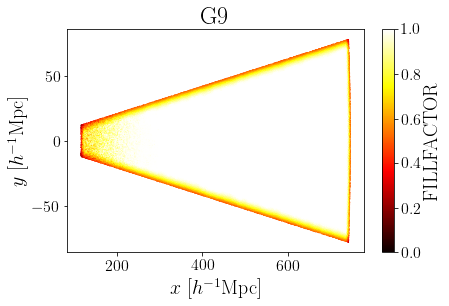

In [34]:
fills     = rand['FILLFACTOR'].data
pos_slice = pos

fills     = fills[np.abs(pos_slice[:,2]) < 5.]
pos_slice = pos_slice[np.abs(pos_slice[:,2]) < 5.]
    
plt.scatter(pos_slice[:,0],\
            pos_slice[:,1],\
            c=fills,\
            marker='.',\
            lw=0.0,\
            s=4,\
            vmin=0.,\
            vmax=1.,\
            cmap='hot')

pl.xlabel('$x$ [$h^{-1}$Mpc]')
pl.ylabel('$y$ [$h^{-1}$Mpc]')

pl.colorbar(label='FILLFACTOR')
    
plt.title('{}'.format(field))
plt.show()

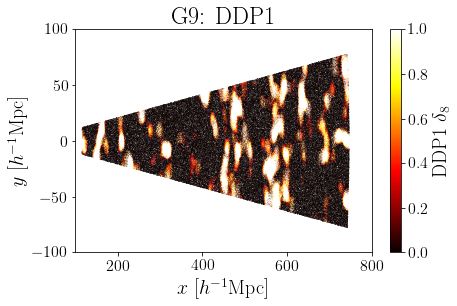

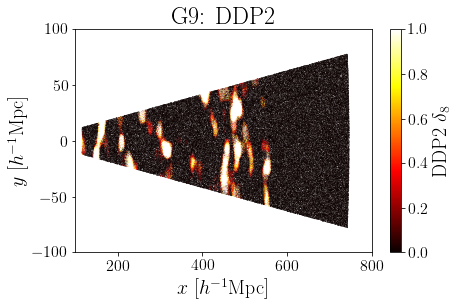

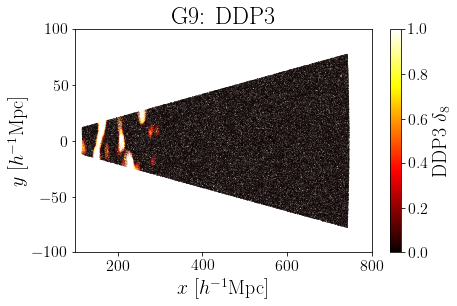

In [35]:
for idx in np.arange(1, 4, 1):
    fills     = rand['DDP{}_DELTA8'.format(idx)].data
    pos_slice = pos

    fills     = fills[np.abs(pos_slice[:,2]) < 5.]
    pos_slice = pos_slice[np.abs(pos_slice[:,2]) < 5.]
    
    plt.scatter(pos_slice[:,0],\
                pos_slice[:,1],\
                c=fills,\
                marker='.',\
                lw=0.0,\
                s=1,\
                vmin=0.,\
                vmax=1.,\
                cmap='hot')
    
    pl.xlabel('$x$ [$h^{-1}$Mpc]')
    pl.ylabel('$y$ [$h^{-1}$Mpc]')

    pl.xlim(100.,  800.)
    pl.ylim(-100., 100.)
    
    pl.colorbar(label='DDP{}  $\delta_8$'.format(idx))
    
    plt.title('{}:  DDP{}'.format(field, idx))
    plt.show()

In [36]:
cmap     = plt.cm.tab20c

cmaplist = [cmap(i) for i in range(cmap.N)]

cmap     = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

bounds   = np.linspace(0, 9, 10)
norm     = mpl.colors.BoundaryNorm(bounds, cmap.N)

-28.964705547597823 29.186701869674778


Text(0.5, 1.0, 'G9:  DDP1')

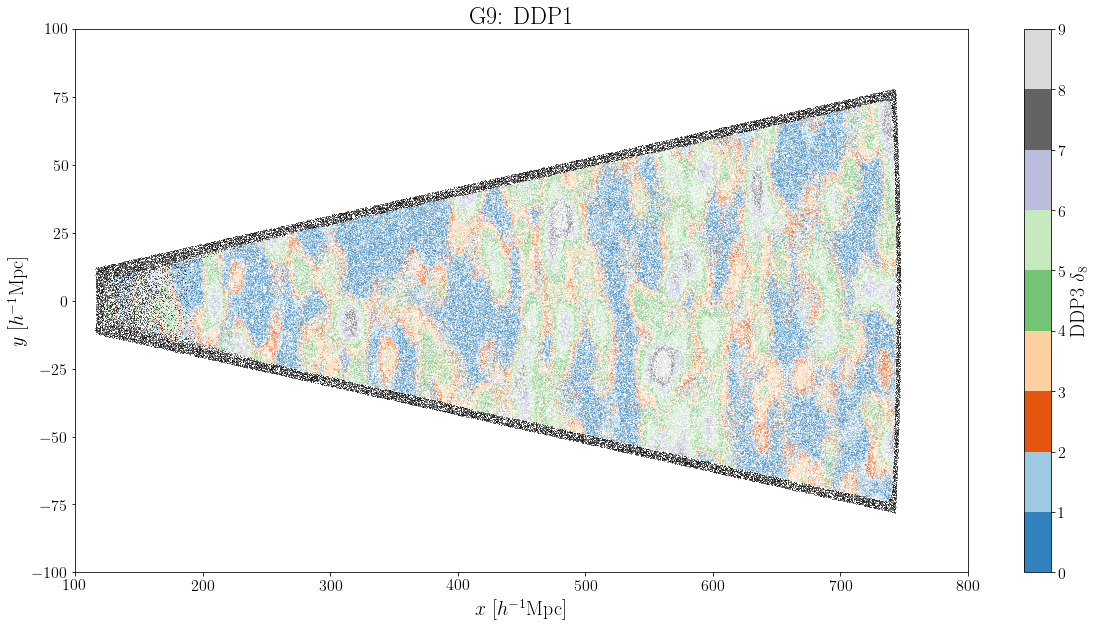

In [66]:
slice_limit = 5.

fig, ax   = plt.subplots(1,1,figsize=(20,10))

isin      = rand['FILLFACTOR'].data > 0.8

fills     = rand['DDP1_DELTA8_TIER'].data[isin]
pos_slice = pos[isin]

lims      = np.sort(pos_slice[:,2])

print(lims[0], lims[-1])

fills     = fills[np.abs(pos_slice[:,2]) < slice_limit]
pos_slice = pos_slice[np.abs(pos_slice[:,2]) < slice_limit]
    
mm = ax.scatter(pos_slice[:,0],\
           pos_slice[:,1],\
           c=fills,\
           marker='.',\
           lw=0.0,\
           s=2,\
           cmap=cmap,\
           norm=norm)

isin      = rand['FILLFACTOR'].data < 0.8
pos_slice = pos[isin]

ax.scatter(pos_slice[:,0][np.abs(pos_slice[:,2]) < slice_limit],\
           pos_slice[:,1][np.abs(pos_slice[:,2]) < slice_limit],\
           c='k',\
           marker='.',\
           lw=0.0,\
           s=2,\
           alpha=0.75)

ax.set_xlabel('$x$ [$h^{-1}$Mpc]')
ax.set_ylabel('$y$ [$h^{-1}$Mpc]')

ax.set_xlim(100.,  800.)
ax.set_ylim(-100., 100.)
    
fig.colorbar(label='DDP{}  $\delta_8$'.format(idx), ax=ax, mappable=mm)
    
ax.set_title('{}:  DDP1'.format(field))

-32.49104495438306 32.60457058897735


Text(0.5, 1.0, 'G9:  DDP1')

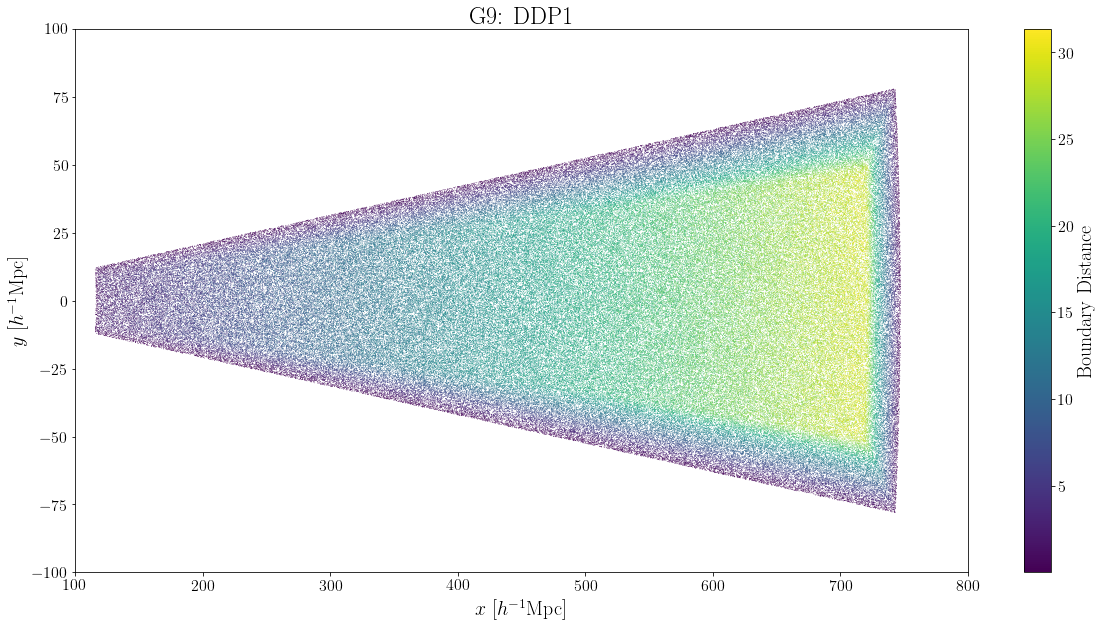

In [60]:
fig, ax   = plt.subplots(1,1,figsize=(20,10))

isin      = rand['FILLFACTOR'].data > 0.0

fills     = rand['BOUND_DIST'].data[isin]
pos_slice = pos[isin]

lims      = np.sort(pos_slice[:,2])

print(lims[0], lims[-1])

fills     = fills[np.abs(pos_slice[:,2]) < 5.]
pos_slice = pos_slice[np.abs(pos_slice[:,2]) < 5.]
    
mm = ax.scatter(pos_slice[:,0],\
           pos_slice[:,1],\
           c=fills,\
           marker='.',\
           lw=0.0,\
           s=2)

ax.set_xlabel('$x$ [$h^{-1}$Mpc]')
ax.set_ylabel('$y$ [$h^{-1}$Mpc]')

ax.set_xlim(100.,  800.)
ax.set_ylim(-100., 100.)
    
fig.colorbar(label='Boundary Distance'.format(idx), ax=ax, mappable=mm)
    
ax.set_title('{}:  DDP1'.format(field))

-32.49104495438306 32.60457058897735


Text(0.5, 1.0, 'G9:  DDP1')

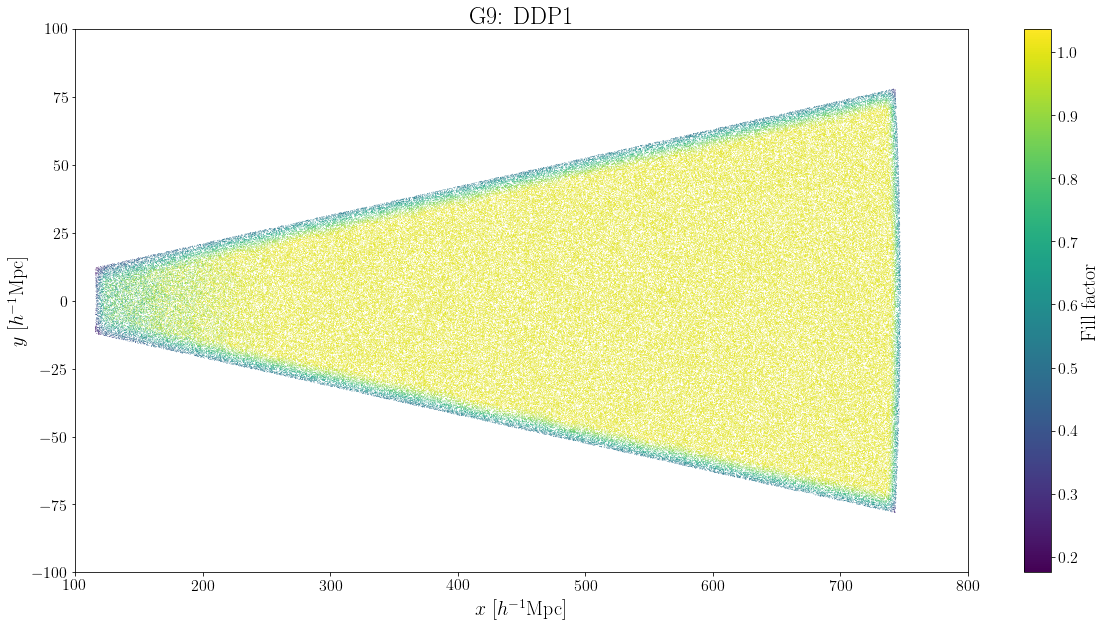

In [61]:
fig, ax   = plt.subplots(1,1,figsize=(20,10))

isin      = rand['FILLFACTOR'].data > 0.0

fills     = rand['FILLFACTOR'].data[isin]
pos_slice = pos[isin]

lims      = np.sort(pos_slice[:,2])

print(lims[0], lims[-1])

fills     = fills[np.abs(pos_slice[:,2]) < 5.]
pos_slice = pos_slice[np.abs(pos_slice[:,2]) < 5.]
    
mm = ax.scatter(pos_slice[:,0],\
           pos_slice[:,1],\
           c=fills,\
           marker='.',\
           lw=0.0,\
           s=2)

ax.set_xlabel('$x$ [$h^{-1}$Mpc]')
ax.set_ylabel('$y$ [$h^{-1}$Mpc]')

ax.set_xlim(100.,  800.)
ax.set_ylim(-100., 100.)
    
fig.colorbar(label='Fill factor'.format(idx), ax=ax, mappable=mm)
    
ax.set_title('{}:  DDP1'.format(field))

Text(0, 0.5, 'DDP1 $\\delta_8$')

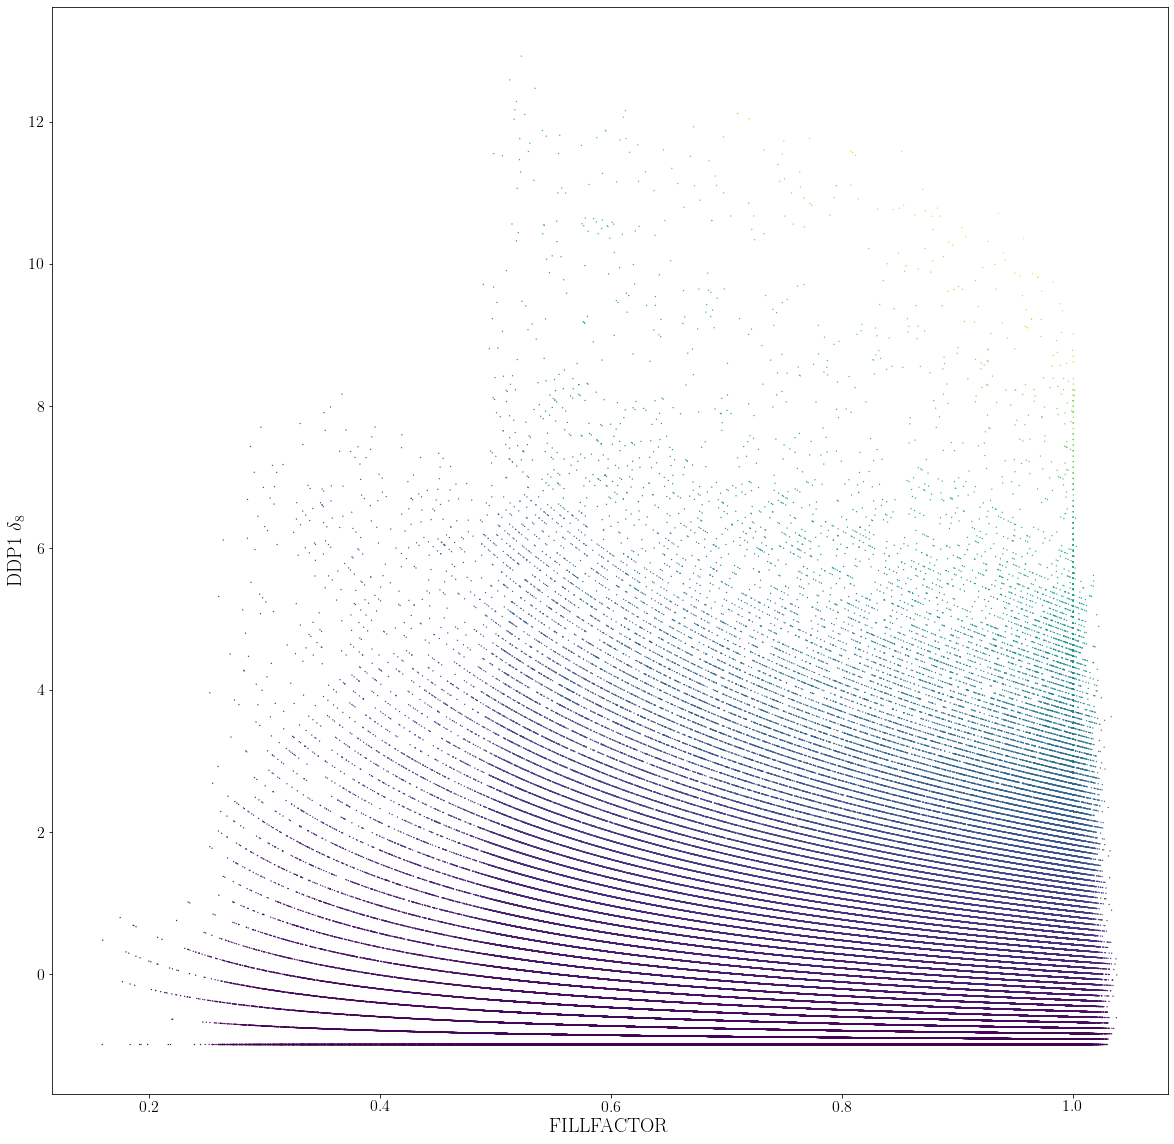

In [39]:
fig, ax = plt.subplots(1,1,figsize=(20,20))

ax.scatter(rand['FILLFACTOR'], rand['DDP1_DELTA8'], marker='.', lw=0.0, c=rand['DDP1_N8'], s=7)

ax.set_xlabel('FILLFACTOR')
ax.set_ylabel('DDP1 $\delta_8$')

Text(0, 0.5, 'DDP2 $\\delta_8$')

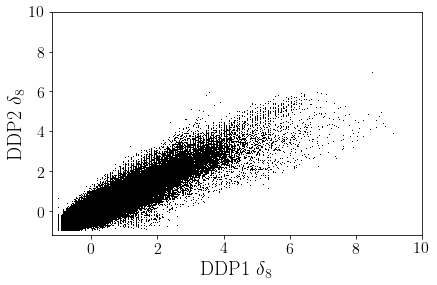

In [38]:
# Larger minimum redshift & Smaller maximum redshift. 
isin = (rand['Z'] > gold.meta['DDP1_ZMIN']) & (rand['Z'] < gold.meta['DDP2_ZMAX'])

pl.plot(rand['DDP1_DELTA8'][isin], rand['DDP2_DELTA8'][isin], marker=',', lw=0.0, c='k')

pl.xlim(-1.2, 10.)
pl.ylim(-1.2, 10.)

pl.xlabel('DDP1 $\delta_8$')
pl.ylabel('DDP2 $\delta_8$')

In [44]:
rand_ddp1fill = np.clip(np.sort(rand[rand['IN_DDP1']]['FILLFACTOR'].data)[::-1], 0, 1) 
rand_ddp2fill = np.clip(np.sort(rand[rand['IN_DDP2']]['FILLFACTOR'].data)[::-1], 0, 1)
rand_ddp3fill = np.clip(np.sort(rand[rand['IN_DDP3']]['FILLFACTOR'].data)[::-1], 0, 1)

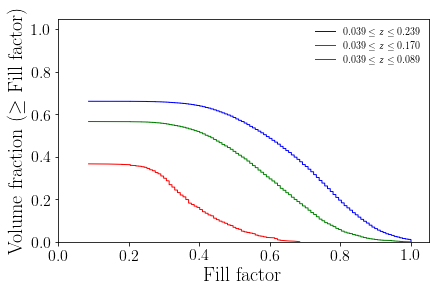

In [45]:
plt.plot(rand_ddp1fill, np.cumsum(rand_ddp1fill) / len(rand_ddp1fill), lw=1, color='blue',  label=r'${:.3f} \leq z \leq {:.3f}$'.format(rand.meta['DDP1_ZMIN'], rand.meta['DDP1_ZMAX']))
plt.plot(rand_ddp2fill, np.cumsum(rand_ddp2fill) / len(rand_ddp2fill), lw=1, color='green', label=r'${:.3f} \leq z \leq {:.3f}$'.format(rand.meta['DDP2_ZMIN'], rand.meta['DDP2_ZMAX']))
plt.plot(rand_ddp3fill, np.cumsum(rand_ddp3fill) / len(rand_ddp3fill), lw=1, color='red',   label=r'${:.3f} \leq z \leq {:.3f}$'.format(rand.meta['DDP3_ZMIN'], rand.meta['DDP3_ZMAX']))

plt.xlabel('Fill factor')
plt.ylabel(r'Volume fraction ($\geq$ Fill factor)')

pl.xlim(0.0, 1.05)
pl.ylim(0.0, 1.05)

plt.legend(frameon=False, loc=1)

# Done.